In [35]:
# Phase 1: Data Collection & Initial Inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set visual style for plots (Academic/Professional look)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
# Assuming you have uploaded the file to Colab or have it locally
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please upload 'WA_Fn-UseC_-Telco-Customer-Churn.csv'")

# 1. View the first 5 rows to understand the structure
print("\n--- Raw Data Preview ---")
display(df.head())

Dataset loaded successfully.

--- Raw Data Preview ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 2. Structure & Data Types
print("\n--- Dataset Info ---")
# We use .info() to detect 'Object' types that should be 'Float' or 'Int'
df.info()




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [7]:
# 3. Check for Missing Values
# Why? ML models (like Logistic Regression) cannot handle NaN values.
print("\n--- Missing Value Count ---")
print(df.isnull().sum())


--- Missing Value Count ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# 4. Target Variable Distribution
# Why? We need to know if the classes are balanced.
# If 'No' is 90% and 'Yes' is 10%, we have an Imbalanced Dataset problem.
churn_counts = df['Churn'].value_counts()
print("\n--- Churn Distribution (Target) ---")
print(churn_counts)


--- Churn Distribution (Target) ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\Muskan\AppData\Local\Temp\ipykernel_18132\1364345652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


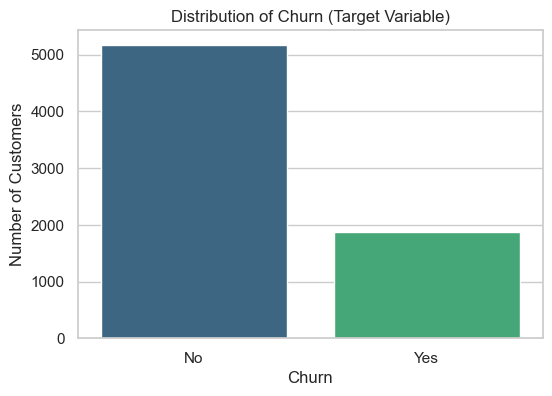

In [11]:
# Visualize the Target Imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title("Distribution of Churn (Target Variable)")
plt.ylabel("Number of Customers")
plt.show()

In [13]:
# Phase 2: Data Cleaning

# 1. Convert 'TotalCharges' to numeric
# The parameter errors='coerce' turns the string " " into NaN (Not a Number) automatically.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check for the new Null values generated
null_count = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in TotalCharges after conversion: {null_count}")

# 3. Handling Missing Values
# Since only 11 rows (out of 7000+) are missing, we can safely drop them.
# Alternative: Fill with 0 (if tenure is 0).
df.dropna(inplace=True)

# 4. Standardize the Target Variable
# ML models prefer numbers over text. Let's convert 'Yes'/'No' to 1/0.
# This helps us calculate correlations later.
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Data Cleaning Complete. Target 'Churn' is now numeric (1/0).")

Number of missing values in TotalCharges after conversion: 11
Data Cleaning Complete. Target 'Churn' is now numeric (1/0).


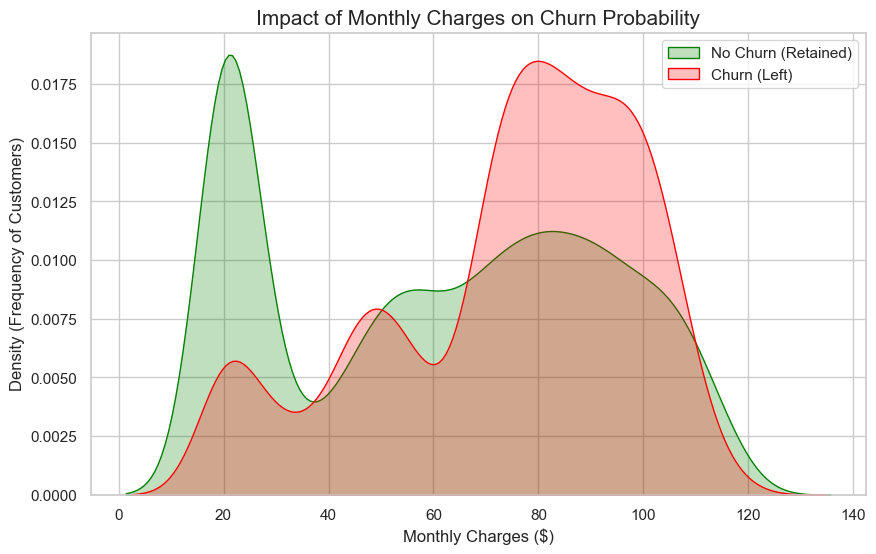

In [15]:
# Set up the visualization canvas
plt.figure(figsize=(10, 6))

# KDE Plot (Kernel Density Estimate)
# We overlay two curves: One for Customers who stayed (Churn=0) and one for those who left (Churn=1)
sns.kdeplot(df[df['Churn'] == 0]['MonthlyCharges'], color='green', fill=True, label='No Churn (Retained)')
sns.kdeplot(df[df['Churn'] == 1]['MonthlyCharges'], color='red', fill=True, label='Churn (Left)')

plt.title('Impact of Monthly Charges on Churn Probability', fontsize=15)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density (Frequency of Customers)')
plt.legend()
plt.show()

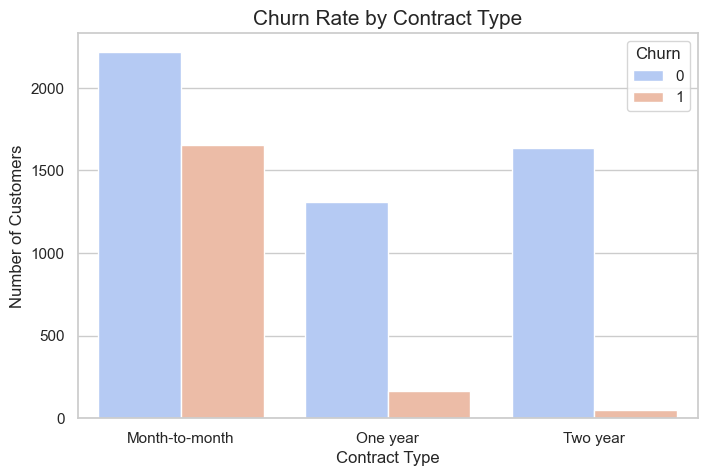

In [17]:
plt.figure(figsize=(8, 5))

# Count Plot to compare categories
# hue='Churn' splits the bars into Yes/No for each contract type
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')

plt.title('Churn Rate by Contract Type', fontsize=15)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

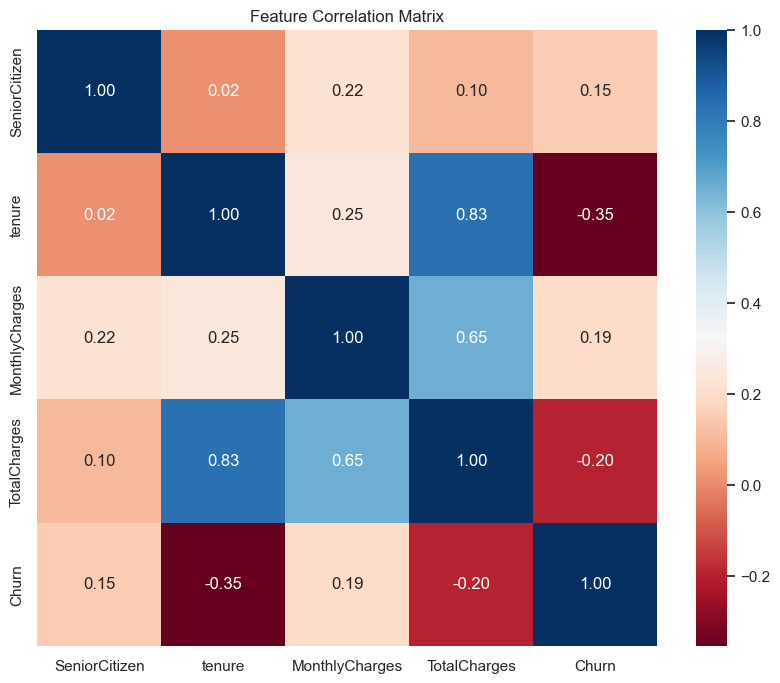

In [19]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [21]:
# Phase 3: Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop Customer ID (Irrelevant)
# We use axis=1 to indicate we are dropping a column, not a row.
df_clean = df.drop(columns=['customerID'])

# 2. One-Hot Encoding
# pd.get_dummies automatically finds categorical columns and encodes them.
# drop_first=True avoids "multicollinearity" (a dummy trap where variables predict each other).
df_encoded = pd.get_dummies(df_clean, drop_first=True)

print(f"Columns after Encoding: {df_encoded.shape[1]}")
# You will see the column count jump from ~20 to ~30+.

# 3. Define X (Features) and y (Target)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# 4. Train-Test Split
# We keep 20% of data aside to test the model later.
# CRITICAL: stratify=y ensures we have the same ratio of Churners in both Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Feature Scaling
# We fit the scaler ONLY on the Training set to avoid "Data Leakage"
scaler = StandardScaler()

# Transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the stats from training data
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability (optional, but good for inspection)
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nData Preprocessing Complete!")
print(f"Training Data Shape: {X_train_final.shape}")
print(f"Test Data Shape: {X_test_final.shape}")

# Preview the Scaled Data
print("\n--- Scaled Data Preview (First 5 Rows) ---")
display(X_train_final.head())

Columns after Encoding: 31

Data Preprocessing Complete!
Training Data Shape: (5625, 30)
Test Data Shape: (1407, 30)

--- Scaled Data Preview (First 5 Rows) ---


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439319,1.321816,0.981556,1.659900,0.996274,1.028312,1.529143,0.327542,-0.327542,1.165543,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
1,-0.439319,-0.267410,-0.971546,-0.562252,0.996274,-0.972468,-0.653961,-3.053048,3.053048,-0.857969,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
2,-0.439319,1.444064,0.837066,1.756104,-1.003740,1.028312,-0.653961,0.327542,-0.327542,1.165543,...,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
3,-0.439319,-1.204646,0.641092,-0.908326,0.996274,-0.972468,-0.653961,0.327542,-0.327542,-0.857969,...,-0.522962,-0.797873,-0.522962,1.250057,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
4,-0.439319,0.669826,-0.808787,-0.101561,-1.003740,1.028312,-0.653961,-3.053048,3.053048,-0.857969,...,-0.522962,1.253332,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,-0.716177,-0.539468


In [23]:
# Phase 4: Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42), # Using linear kernel for interpretability
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 2. Train and Predict Loop
print("--- Model Training & Initial Evaluation ---")

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_final, y_train)

    # Make predictions on the Test Set
    y_pred = model.predict(X_test_final)

    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.2%}")

# 3. Compare Results
print("\n--- Leaderboard ---")
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_results:
    print(f"{name}: {score:.2%}")

--- Model Training & Initial Evaluation ---

Training Logistic Regression...
Logistic Regression Accuracy: 80.38%

Training Support Vector Machine...
Support Vector Machine Accuracy: 79.89%

Training Random Forest...
Random Forest Accuracy: 78.82%

--- Leaderboard ---
Logistic Regression: 80.38%
Support Vector Machine: 79.89%
Random Forest: 78.82%


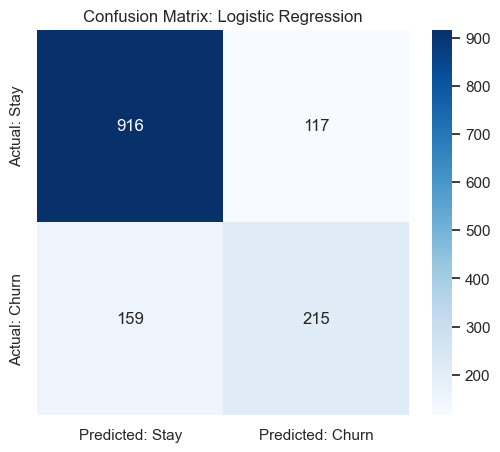

In [25]:
# Visualizing the Confusion Matrix for the Best Performer (usually Logistic Regression here)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Let's assume Logistic Regression performed best for now
best_model = models["Logistic Regression"]
y_pred_best = best_model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Stay', 'Predicted: Churn'],
            yticklabels=['Actual: Stay', 'Actual: Churn'])
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

In [27]:
# Phase 5: Handling Imbalance with SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. View original class distribution
print(f"Original Training Count: {Counter(y_train)}")

# 2. Apply SMOTE
# We only apply SMOTE to the TRAINING data. Never the Test data.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

print(f"Resampled Training Count: {Counter(y_train_smote)}")
# You will see the counts are now equal (e.g., 4000 No, 4000 Yes)

Original Training Count: Counter({0: 4130, 1: 1495})
Resampled Training Count: Counter({0: 4130, 1: 4130})


In [29]:
from sklearn.model_selection import GridSearchCV

# 1. Define the Parameter Grid
# These are the settings we want to test
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [10, 20, None],      # How deep each tree can go
    'min_samples_split': [2, 5],      # Minimum samples to split a node
    'class_weight': ['balanced']      # Give extra weight to the minority class
}

# 2. Initialize Grid Search
# cv=5 means "Cross Validation": it splits data into 5 parts to verify results 5 times.
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid,
                       cv=5,
                       scoring='recall', # We prioritize Recall here!
                       n_jobs=-1)

# 3. Fit the model (This might take 1-2 minutes)
print("Training Best Model... Please wait.")
rf_grid.fit(X_train_smote, y_train_smote)

print(f"\nBest Parameters: {rf_grid.best_params_}")

Training Best Model... Please wait.

Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}



--- Final Model Performance (Tuned Random Forest) ---
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.63      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.79      1407



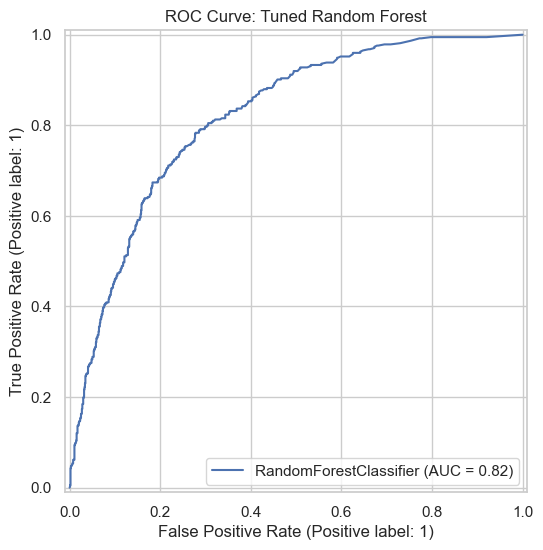

In [30]:
# Make predictions with the tuned model
y_pred_tuned = rf_grid.best_estimator_.predict(X_test_final)

# Print the full report
print("\n--- Final Model Performance (Tuned Random Forest) ---")
print(classification_report(y_test, y_pred_tuned))

# Visualizing ROC-AUC Curve
# This curve shows the trade-off between True Positives and False Positives.
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_grid.best_estimator_, X_test_final, y_test)
plt.title("ROC Curve: Tuned Random Forest")
plt.show()

In [33]:
import joblib

# 1. Save the best model (The Tuned Random Forest)
joblib.dump(rf_grid.best_estimator_, 'churn_model.pkl')

# 2. Save the Scaler (CRITICAL!)
# If we don't scale the user's input the same way we scaled training data, the prediction will be wrong.
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and Scaler saved successfully as .pkl files.")
print("👉 Please download these 2 files from the Colab 'Files' sidebar to your computer.")

✅ Model and Scaler saved successfully as .pkl files.
👉 Please download these 2 files from the Colab 'Files' sidebar to your computer.
